<a href="https://colab.research.google.com/github/Radhakrishna2055/23CSBTB39-40/blob/main/Labexam_expno2(Decision%20Tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0   

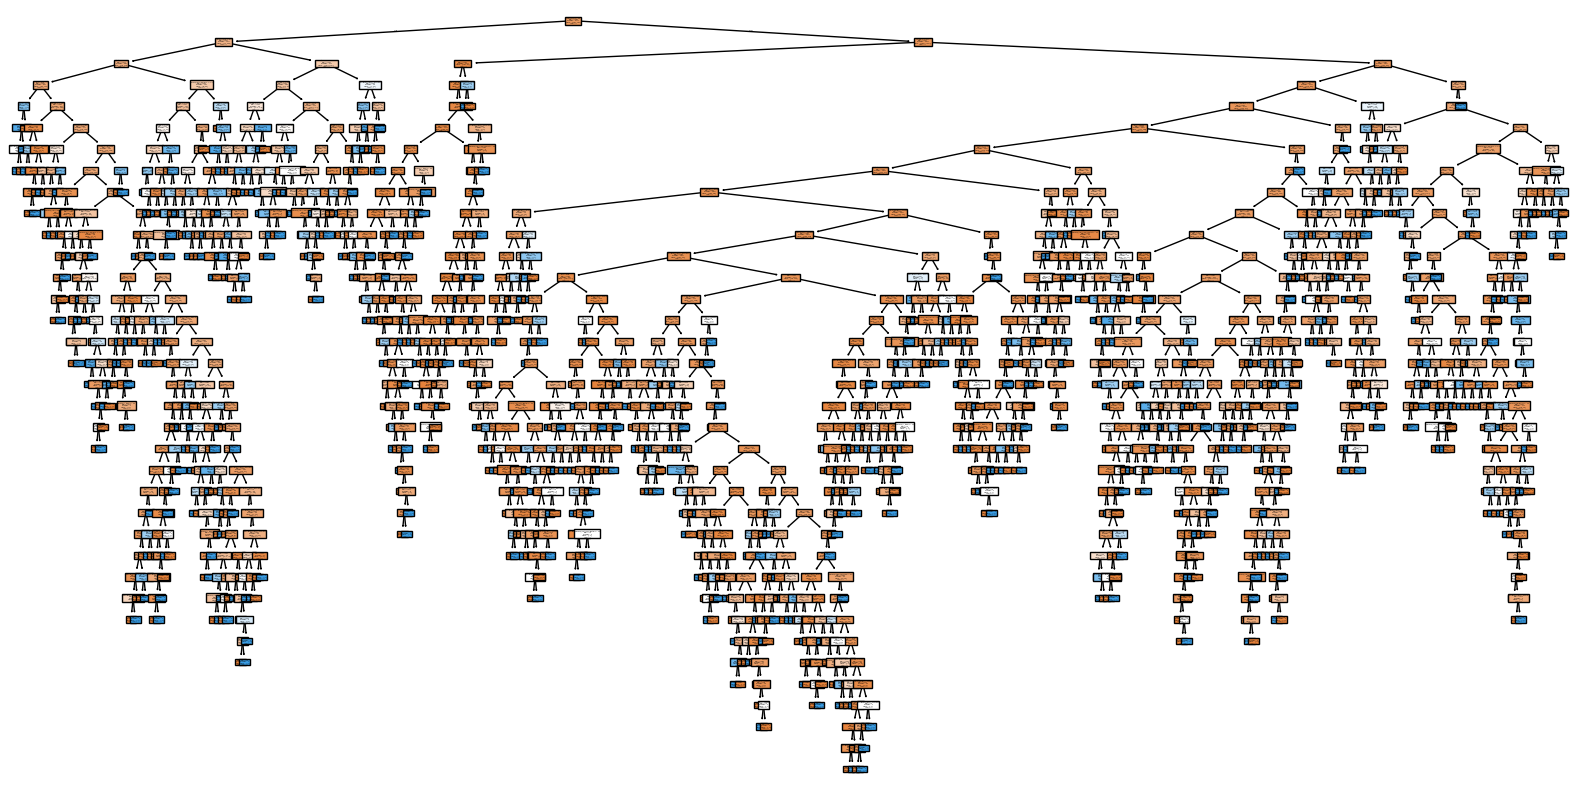

In [1]:
from IPython import get_ipython
from IPython.display import display
# %%
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt
# Import the OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
# Replace 'your_dataset.csv' with the actual path of your dataset file
data = pd.read_csv('loan_data.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Assuming the last column is the target, separate features and target variable
X = data.iloc[:, :-1]  # Features (all columns except the last one)
y = data.iloc[:, -1]   # Target (last column)

# Identify categorical features (e.g., 'purpose' column)
categorical_features = ['purpose']  # Replace with your actual categorical feature columns

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for dense output

# Fit and transform the categorical features using OneHotEncoder
encoded_features = encoder.fit_transform(X[categorical_features])

# Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Drop the original categorical features and concatenate the encoded features
X = X.drop(categorical_features, axis=1)
X = pd.concat([X, encoded_df], axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(20,10))
# Convert clf.classes_ to a list of strings for class_names
class_names = [str(c) for c in clf.classes_]
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=class_names)
plt.show()